## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [137]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [138]:
# Random state seed
rseed = 42

## Load and explore data

In [139]:
# Import the dataset
df = pd.read_csv('Country-data.csv')

In [140]:
# Check the shape
print(f"Shape of the dataset: {df.shape}", end='\n\n')

# Check the first few rows
print(df.head(), end='\n\n')

Shape of the dataset: (167, 10)

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  



In [141]:
# Check datatypes & counts
print("\nData types and counts:\n")
print(df.info())


Data types and counts:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None


In [142]:
# Get descriptive statistics
print('Descriptive statistics:\n')
print(df.describe().round(2))

Descriptive statistics:

       child_mort  exports  health  imports     income  inflation  life_expec  \
count      167.00   167.00  167.00   167.00     167.00     167.00      167.00   
mean        38.27    41.11    6.82    46.89   17144.69       7.78       70.56   
std         40.33    27.41    2.75    24.21   19278.07      10.57        8.89   
min          2.60     0.11    1.81     0.07     609.00      -4.21       32.10   
25%          8.25    23.80    4.92    30.20    3355.00       1.81       65.30   
50%         19.30    35.00    6.32    43.30    9960.00       5.39       73.10   
75%         62.10    51.35    8.60    58.75   22800.00      10.75       76.80   
max        208.00   200.00   17.90   174.00  125000.00     104.00       82.80   

       total_fer       gdpp  
count     167.00     167.00  
mean        2.95   12964.16  
std         1.51   18328.70  
min         1.15     231.00  
25%         1.80    1330.00  
50%         2.41    4660.00  
75%         3.88   14050.00  
max  

In [143]:
# Identify any missing data
print("\nMissing data in each column:")
print(df.isnull().sum())



Missing data in each column:
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


## Preprocessing and Feature Selection

In [ ]:
# Drop any non-numeric features (columns)
# Check unique values in 'country'
print(f"Unique countries: {df['country'].nunique()}", end='\n\n') # Too many unique values to one-hot encode

# Drop the 'country' column
df.drop(columns=['country'], inplace=True)

# Check new dataset shape
print(f"Shape after dropping 'country': {df.shape}", end='\n\n')
print(df.head())

Unique countries: 167

Shape after dropping 'country': (167, 9)

   child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200  


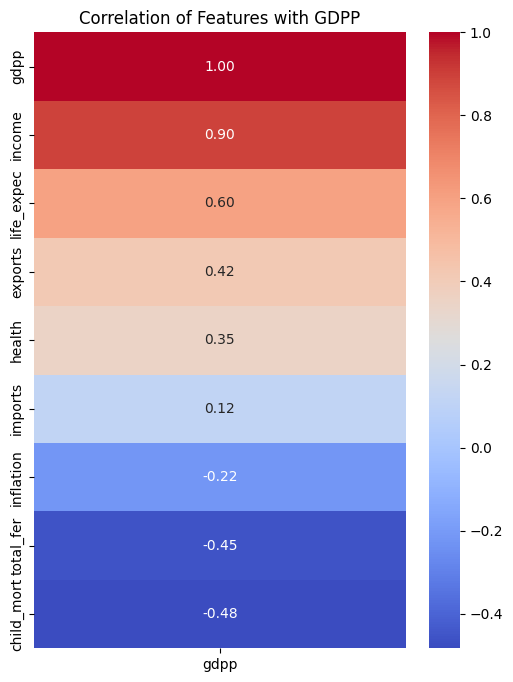

In [220]:
# Create a correlation map of features to explore relationships between features
# Hint: Explore seaborn heatmap
# Plot correlation map of independent variables vs. GDPP
corr_matrix = df.corr()
gdpp_corr = corr_matrix[['gdpp']].sort_values(by='gdpp', ascending=False)

# Plot
plt.figure(figsize=(6, 8))
sns.heatmap(gdpp_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of Features with GDPP')

plt.show()


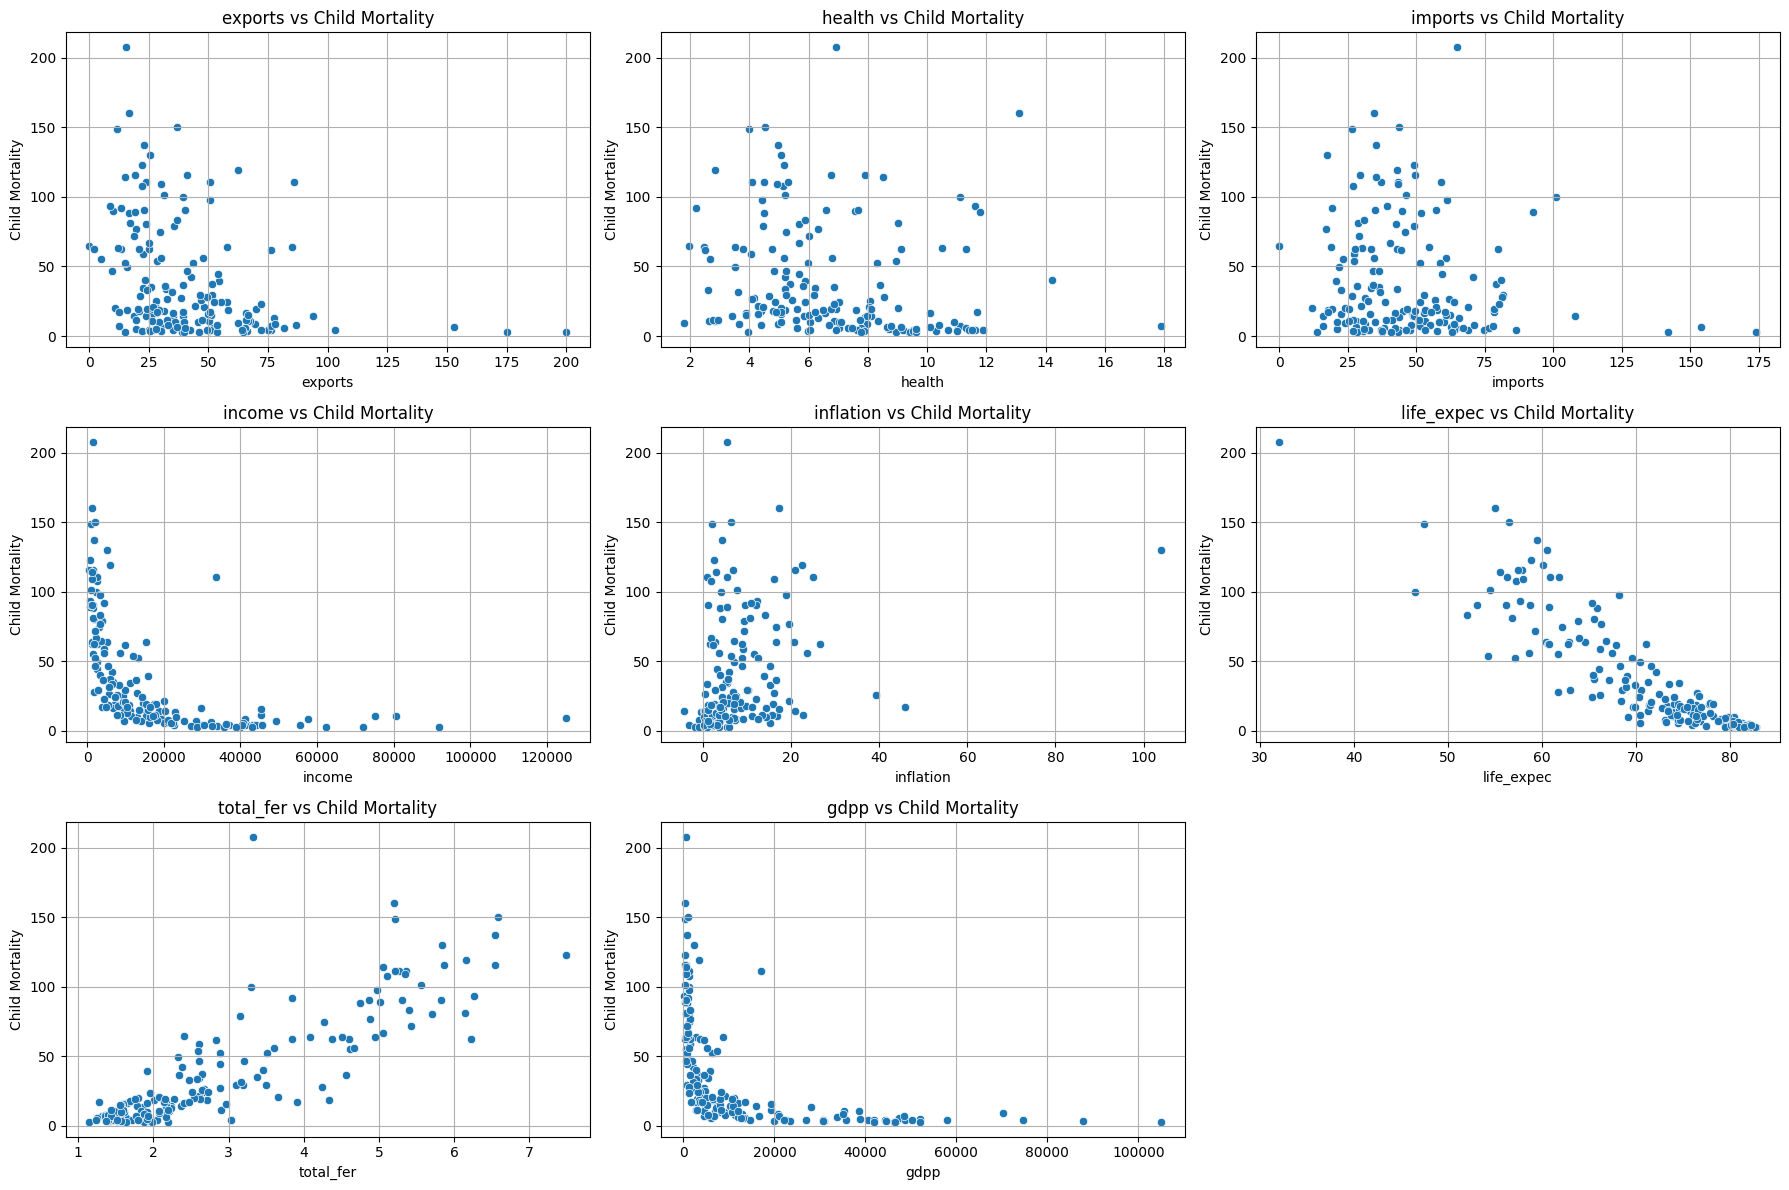

In [249]:
# Explore the continuous independent features against child_mort using scatter plots.
features = df.columns[1:]  # All columns except 'child_mort

plt.figure(figsize=(18, 12))  # Big enough figure for many plots

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  # Arrange plots in a 3x3 grid 
    sns.scatterplot(data=df, x=feature, y='child_mort')
    plt.title(f'{feature} vs Child Mortality')
    plt.xlabel(feature)
    plt.ylabel('Child Mortality')
    plt.grid(True)

plt.tight_layout() # To be able to see all plots clearly
plt.show()

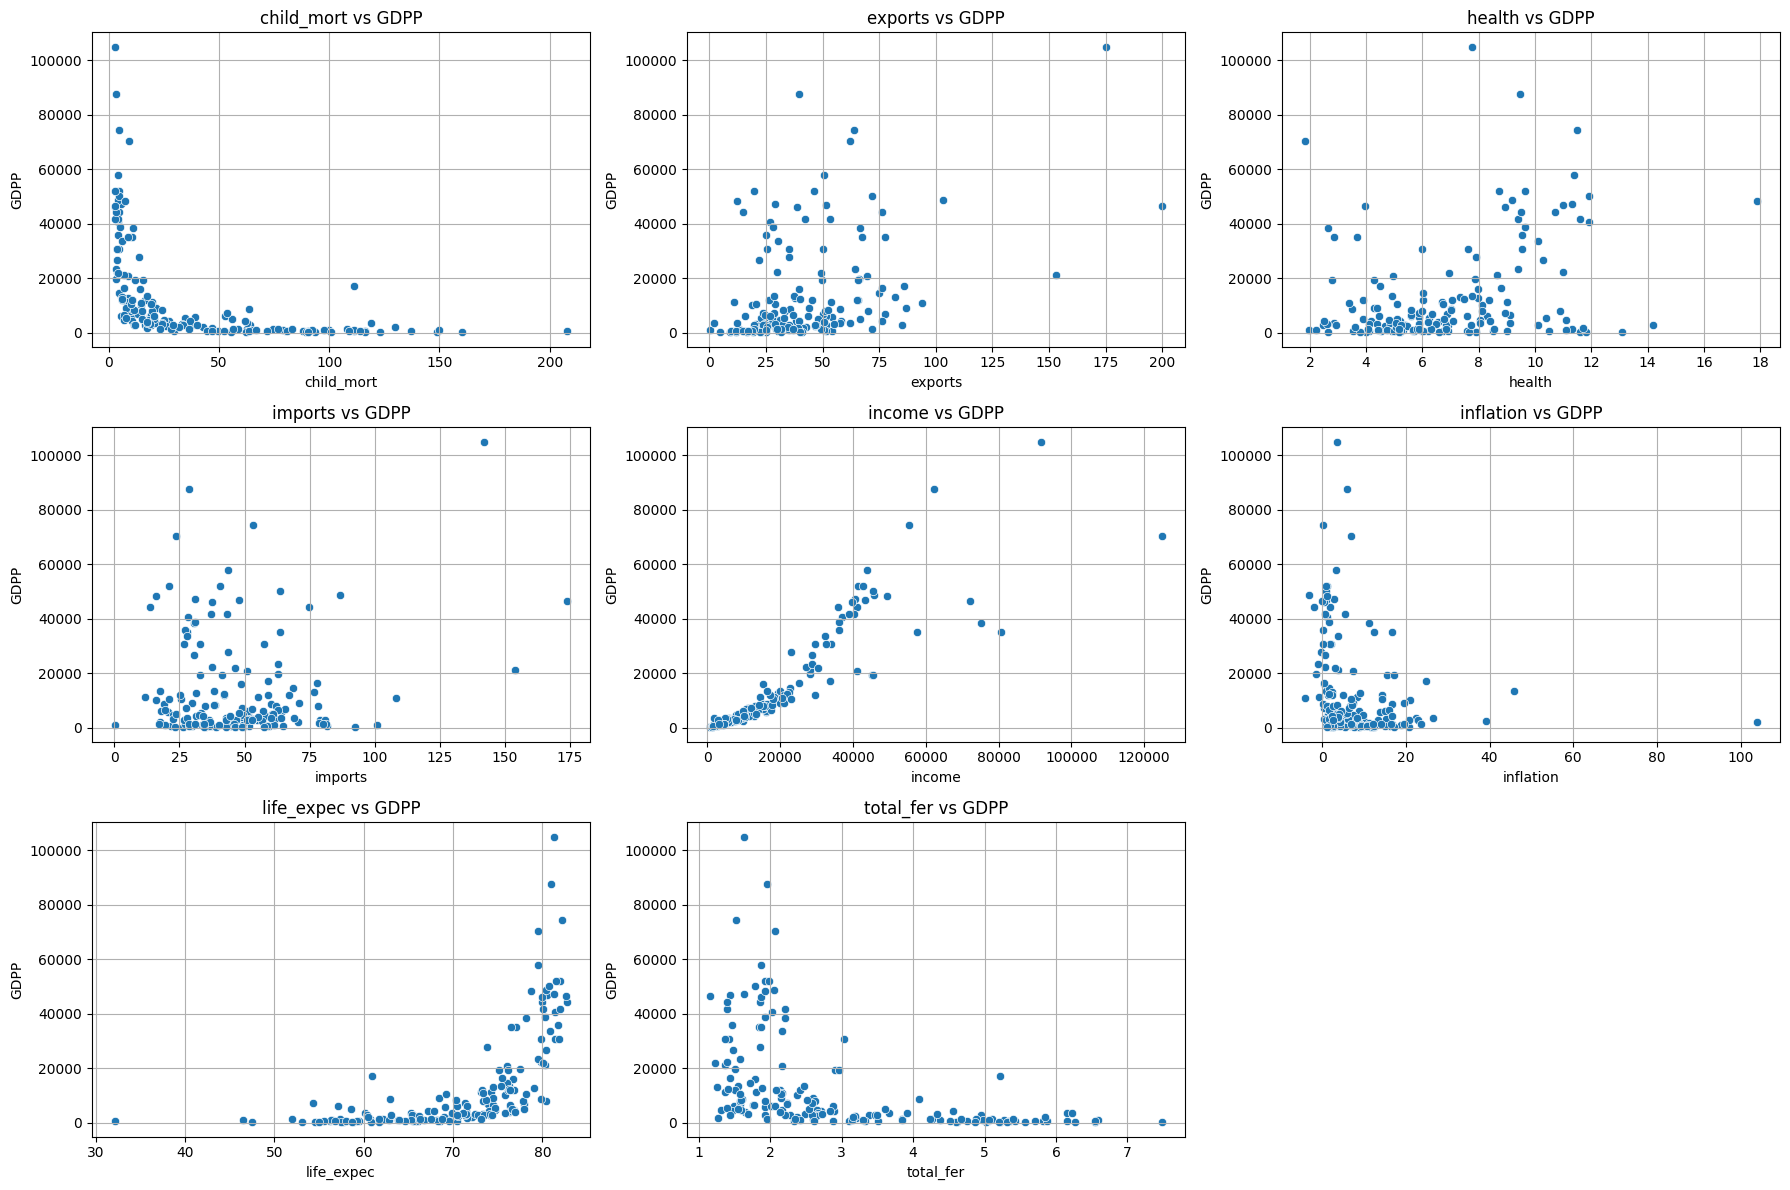

In [250]:
# Explore the continuous independent features against gdpp using scatter plots.
features = df.columns[:-1]  # All columns except 'gdpp'

plt.figure(figsize=(18, 12))  # Big enough figure for many plots

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  # Arrange plots in a 3x3 grid 
    sns.scatterplot(data=df, x=feature, y='gdpp')
    plt.title(f'{feature} vs GDPP')
    plt.xlabel(feature)
    plt.ylabel('GDPP')
    plt.grid(True)

plt.tight_layout() # To be able to see all plots clearly
plt.show()

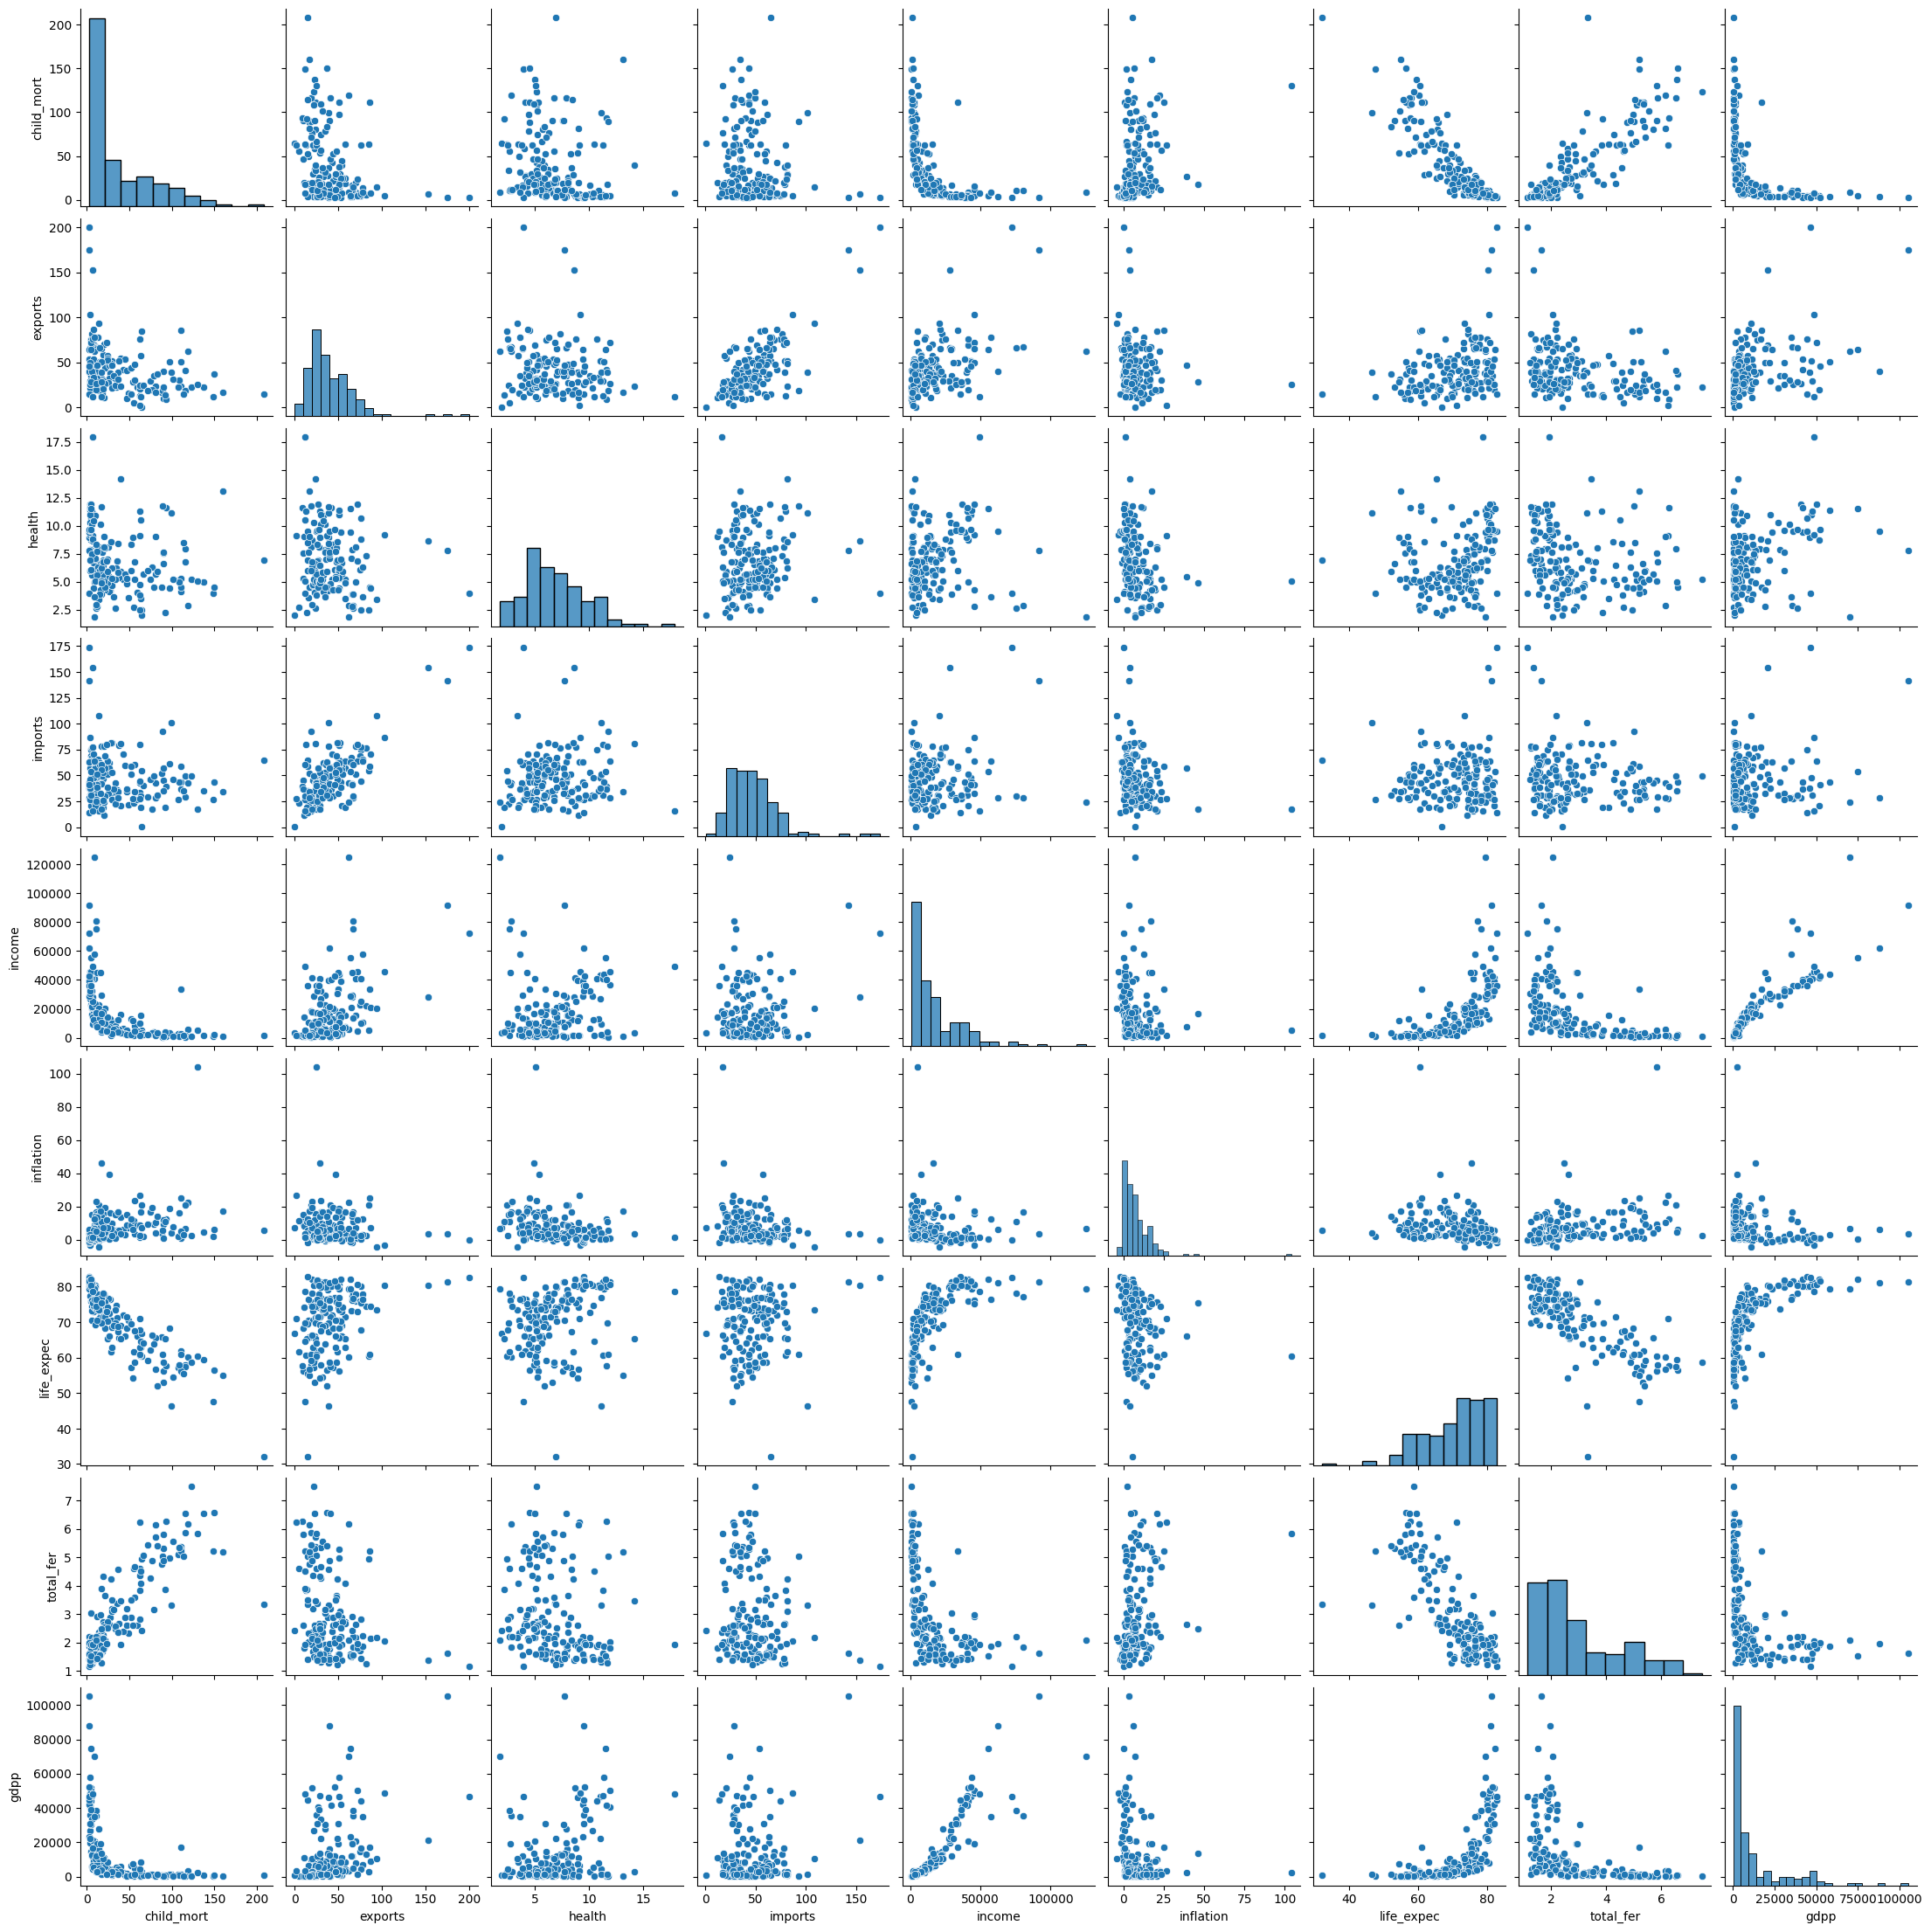

In [255]:
# Create a pair plot
# Hint: Explore seaborn pairplot

# Basic pair plot of the dataset
sns.pairplot(df)
plt.show()

Note the peaks in the diagonal graphs that are distinct from each other or only overlap slightly. Looking at the scatter plot distributions may also give you some indication of features that would be good candidates for clustering the data.

### Scaling the Data

In [268]:
# Normalise the data using MinMaxScaler
# Initialise the scaler
scaler = MinMaxScaler()

# Fit and transform the data (all numeric columns)
scaled_array = scaler.fit_transform(df)

# Name the normalised dataframe "df_scaled"
# Convert back to DataFrame to keep column names
df_scaled = pd.DataFrame(scaled_array, columns=df.columns)

# df_scaled.head()
print(df_scaled.head().round(3))

   child_mort  exports  health  imports  income  inflation  life_expec  \
0       0.426    0.049   0.359    0.258   0.008      0.126       0.475   
1       0.068    0.140   0.295    0.279   0.075      0.080       0.872   
2       0.120    0.192   0.147    0.180   0.099      0.188       0.876   
3       0.567    0.311   0.065    0.246   0.043      0.246       0.552   
4       0.037    0.227   0.262    0.338   0.149      0.052       0.882   

   total_fer   gdpp  
0      0.737  0.003  
1      0.079  0.037  
2      0.274  0.040  
3      0.790  0.031  
4      0.155  0.114  


## K-Means Clustering

### Selecting K

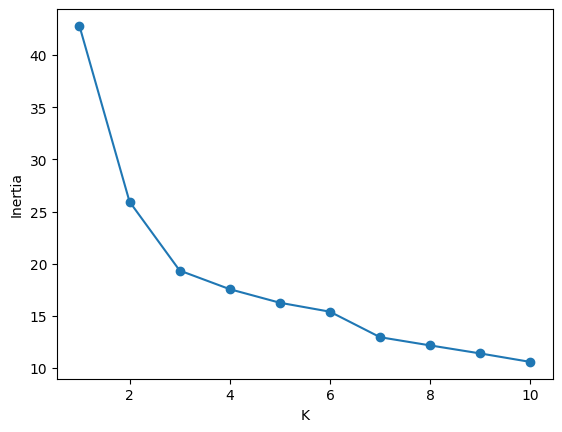

In [285]:
# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

    # Plot elbow curve using scaled dataset

elbow_Kmeans(df_scaled, max_k=10, r=rseed)

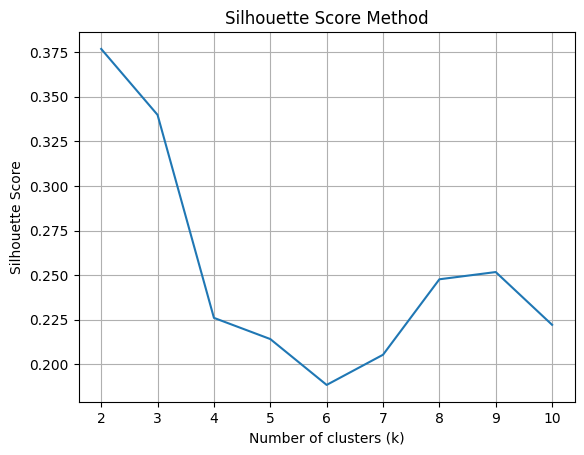

In [301]:
# Silhouette score method
kmax = 10
sil = []

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


Based on the elbow and silhouette score method choose a value for K.

We selected **k = 2** clusters based on the evaluation of both the elbow method and the silhouette score:

- **Elbow Method:**  
  The inertia (within-cluster sum of squares) sharply decreases from k=1 to k=2, indicating a substantial improvement in clustering quality. After k=2, the rate of decrease slows down, forming an "elbow" shape on the plot. This suggests that adding more clusters beyond 2 yields diminishing returns in explaining the variance.

- **Silhouette Score:**  
  The silhouette score was highest at k=2 (~0.375), indicating that the clusters at this number are well separated and cohesive. Higher silhouette scores mean better-defined clusters, and the score decreases for k > 2.

Together, these methods suggest that **two clusters** best capture the natural grouping in the data without overfitting or creating overly complex models.


## Fitting a K-Means Model with the selected K value

In [ ]:
# Remember to set the random_state to rseed
best_k = 2 

kmeans_final = KMeans(n_clusters=best_k, random_state=rseed, max_iter=500)
kmeans_final.fit(df_scaled)

KMeans(max_iter=500, n_clusters=2, random_state=42)

In [327]:
# Count the number of records in each cluster
labels = kmeans_final.labels_
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))

print("Number of records in each cluster:")
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} records")

Number of records in each cluster:
Cluster 0: 55 records
Cluster 1: 112 records


In [328]:
# Check model performance with the silhouette coefficient
score = silhouette_score(df_scaled, labels, metric='euclidean')
print(f"Silhouette Score for k={best_k}: {score:.3f}")

Silhouette Score for k=2: 0.377


## Predictions

In [332]:
# Add the predicted cluster label column to the original dataframe
df['cluster_label'] = labels

# Check the first few rows to confirm
df.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


## Visualisation of clusters

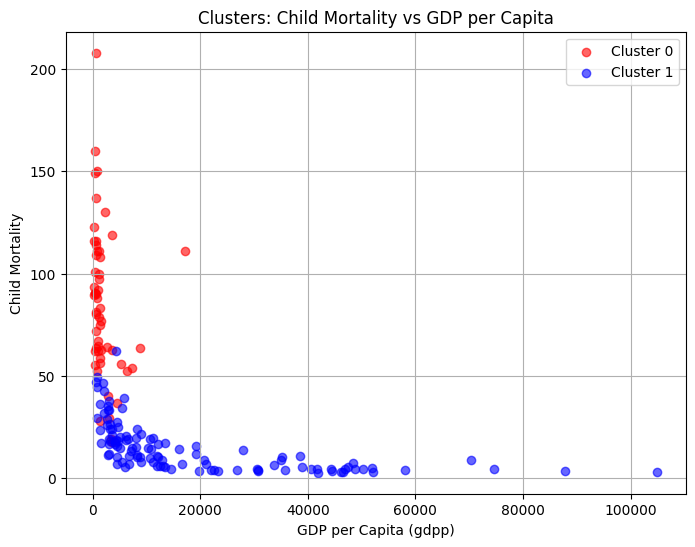

In [336]:
# Visualisation of clusters: child mortality vs gdpp
# Scatter plot colored by cluster label
plt.figure(figsize=(8,6))
colors = ['red', 'blue']  # Colors for clusters 0 and 1

for cluster in df['cluster_label'].unique():
    clustered_data = df[df['cluster_label'] == cluster]
    plt.scatter(clustered_data['gdpp'], clustered_data['child_mort'], 
                c=colors[cluster], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('GDP per Capita (gdpp)')
plt.ylabel('Child Mortality')
plt.title('Clusters: Child Mortality vs GDP per Capita')
plt.legend()
plt.grid(True)
plt.show()


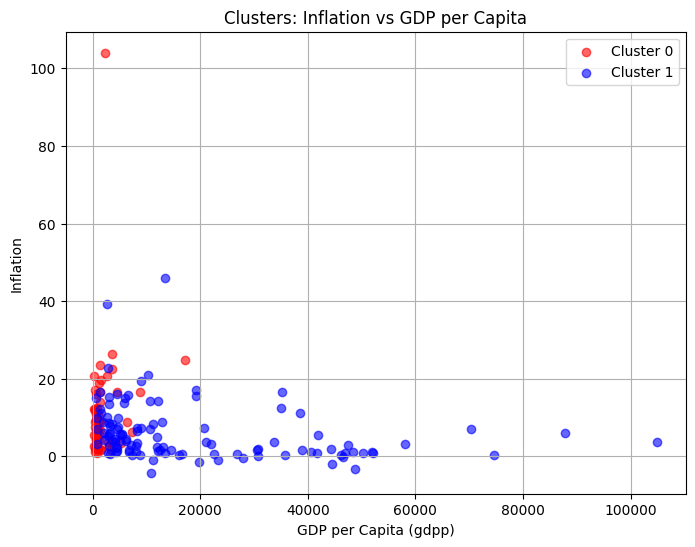

In [338]:
# Visualisation of clusters: inflation vs gdpp
plt.figure(figsize=(8,6))
colors = ['red', 'blue']  # For clusters 0 and 1

for cluster in df['cluster_label'].unique():
    clustered_data = df[df['cluster_label'] == cluster]
    plt.scatter(clustered_data['gdpp'], clustered_data['inflation'], 
                c=colors[cluster], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('GDP per Capita (gdpp)')
plt.ylabel('Inflation')
plt.title('Clusters: Inflation vs GDP per Capita')
plt.legend()
plt.grid(True)
plt.show()

## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use [terms](https://en.wikipedia.org/wiki/Developing_country#Terms_used_to_classify_countries) such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


In [341]:
cluster_summary = df.groupby('cluster_label')[['gdpp', 'child_mort', 'inflation']].mean().round(2)
print(cluster_summary)

                   gdpp  child_mort  inflation
cluster_label                                 
0               1955.42       85.06      11.13
1              18370.23       15.29       6.14


**Answer here:**

The clustering analysis divided the countries into two distinct groups based on GDP per capita, child mortality, and inflation:

- **Cluster 0:**  
  Countries with lower income (average GDP per capita ~$1,955), high child mortality (~85 per 1,000 live births), and moderately high inflation (~11%). These characteristics are typical of **developing countries** or **low to lower-middle income countries** facing significant health and economic challenges.

- **Cluster 1:**  
  Countries with much higher income (average GDP per capita ~$18,370), low child mortality (~15 per 1,000 live births), and lower inflation (~6%). This cluster aligns with **developed countries** or **high-income countries** with better health outcomes and more stable economies.

This analysis highlights how economic and health indicators can effectively separate countries into meaningful groups reflecting their development status.
